In [4]:
import numpy as np
import h5py
filename = 'mnist_network_params.hdf5'
hf = h5py.File(filename)
W1 = hf.get('W1')
W1 = np.array(W1)
W2 = hf.get('W2')
W2 = np.array(W2)
W3 = hf.get('W3')
W3 = np.array(W3)
b1 = hf.get('b1')
b1 = np.array(b1)
b2 = hf.get('b2')
b2 = np.array(b2)
b3 = hf.get('b3')
b3 = np.array(b3)
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)
print(W3.shape)
print(b3.shape)



(200, 784)
(200,)
(100, 200)
(100,)
(10, 100)
(10,)


In [2]:
hf2 = h5py.File('mnist_testdata.hdf5')
xdata = hf2.get('xdata')
ydata = hf2.get('ydata')
xdataNP = np.array(xdata)
ydataNP = np.array(ydata)
print(ydataNP[0])
print(xdataNP.shape)
print(ydataNP.shape)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(10000, 784)
(10000, 10)


In [5]:
def ReLu(x):
    ndarray = np.zeros((len(x),len(x[0])))
    for i in range(0,len(x)):
        for j in range(0,len(x[0])):
            ndarray[i][j] = max(0,x[i][j])
    return ndarray

def Softmax(x):
    return np.exp(x)/np.sum(np.exp(x))
    
    

In [10]:
Wt = np.transpose(W1)
bt = np.transpose(b1)
eq = np.dot(xdataNP,Wt) + bt
output1 = ReLu(eq)
print(output1.shape)
Wt2 = np.transpose(W2)
bt2 = np.transpose(b2)
eq2 = np.dot(output1,Wt2)+bt2
output2 = ReLu(eq2)
print(output2.shape)
Wt3 = np.transpose(W3)
bt3 = np.transpose(b3)
eq3 = np.dot(output2,Wt3)+bt3
output3 = Softmax(eq3)
print(output3)
print(output3.shape)
print(ydata.shape)

(10000, 200)
(10000, 100)
[[9.25181849e-19 4.04327472e-19 3.54257605e-16 ... 3.78148031e-10
  1.43722407e-18 1.06333213e-16]
 [1.42473978e-19 9.53308073e-16 2.02275260e-09 ... 2.74492786e-22
  3.31070530e-16 3.56077547e-28]
 [9.58279175e-20 4.98189216e-14 4.75359071e-18 ... 7.04343136e-18
  1.97228316e-17 2.84790992e-20]
 ...
 [5.55454188e-21 5.44158960e-21 6.31236237e-22 ... 8.99521567e-17
  3.79159091e-18 1.53553606e-14]
 [1.23037617e-19 5.65202311e-21 7.27927274e-23 ... 1.17235606e-20
  9.25962380e-14 1.37808733e-20]
 [2.16943900e-17 1.42841464e-20 9.26066218e-18 ... 5.13946169e-26
  6.37109267e-20 4.98149429e-21]]
(10000, 10)
(10000, 10)


In [8]:
res = 0
for i in range(0,len(output3)):
    result = np.where(output3[i] == np.max(output3[i]))
    if result == np.where(ydataNP[i]==1):
        res += 1
print(res)

9790


match start


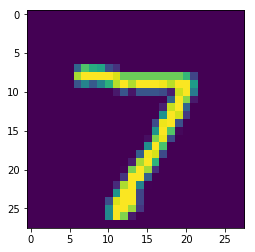

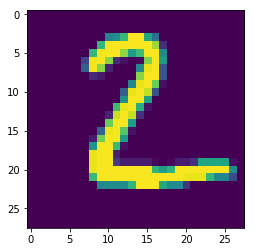

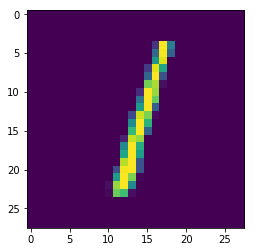

dismatch start


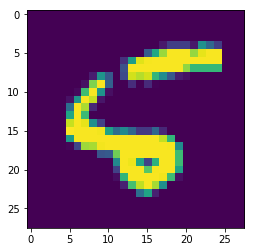

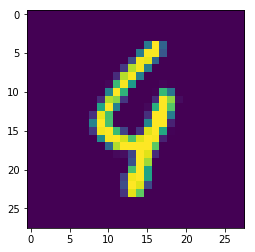

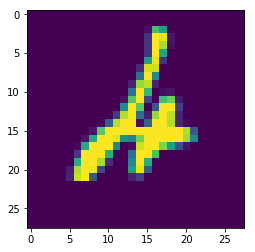

In [28]:
import matplotlib.pyplot as plt
print('match start')
count = 0
for i in range(0,len(output3)):
    matchres = np.where(output3[i] == np.max(output3[i]))
    if matchres == np.where(ydataNP[i]==1):
        plt.imshow(xdata[i].reshape(28,28))
        plt.show()
        count +=1
        if count==3:
            break
        else:
            continue

print('dismatch start')
discount =0
for i in range(0,len(output3)):
    dismatchres = np.where(output3[i] == np.max(output3[i]))
    if dismatchres != np.where(ydataNP[i]==1):
        plt.imshow(xdata[i].reshape(28,28))
        plt.show()
        discount +=1
        if discount == 3:
            break
        else:
            continue       
